# Group 2 Project

E-Commerce Shipping Dataset downloaded from https://www.kaggle.com/datasets/prachi13/customer-analytics<br>

This dataset contains customer information of an international e-commerce company. By implementing machine learning techniques we were hoping to find the patterns and create a model that will predict if future products will be delivered to the customers on time.<br><br>

Features:<br>
    1. ID: ID Number of Customers.<br>
    2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.<br>
    3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
    4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.<br>
    5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
    6. Cost of the product: Cost of the Product in US Dollars.<br>
    7. Prior purchases: The Number of Prior Purchase.<br>
    8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.<br>
    9. Gender: Male and Female.<br>
    10.Discount offered: Discount offered on that specific product.<br>
    11.Weight in gms: It is the weight in grams.<br>
<br>
Target:<br>
    Reached on time: 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Importing Libraries

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

In [ ]:
data = pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.shape

(10999, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<Axes: >

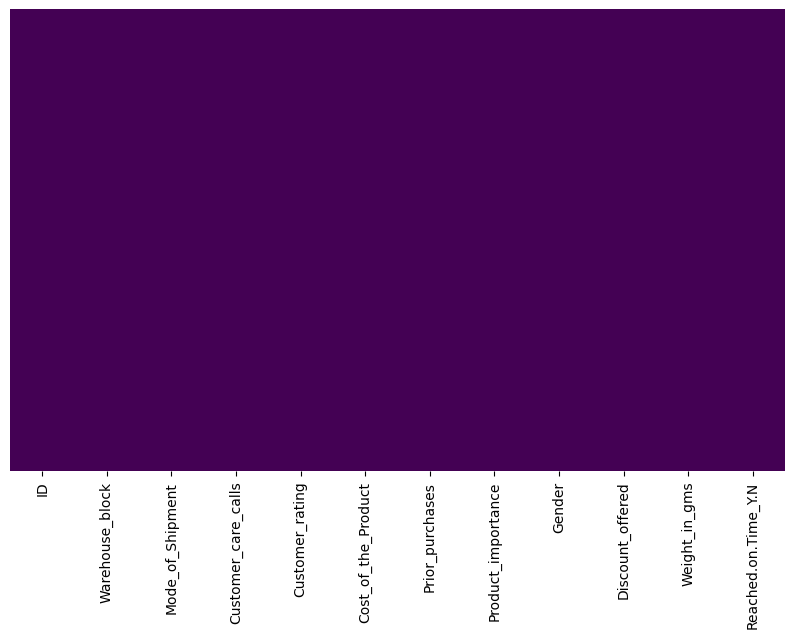

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

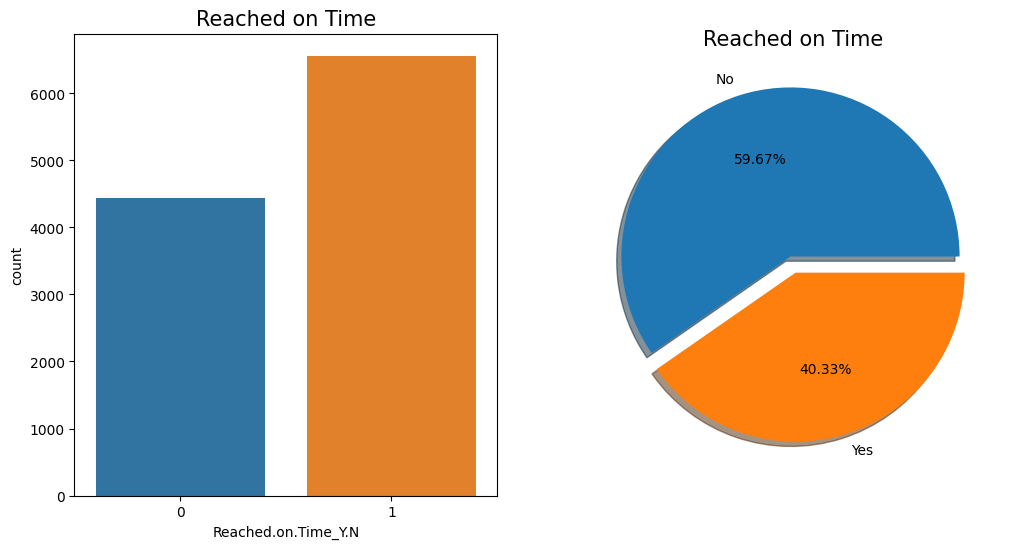

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Reached on Time', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(data['Reached.on.Time_Y.N'].value_counts(), labels=['No', 'Yes'], explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Reached on Time', fontsize=15)

plt.show()

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Customer_care_calls'}>,
        <Axes: title={'center': 'Customer_rating'}>],
       [<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Prior_purchases'}>,
        <Axes: title={'center': 'Discount_offered'}>],
       [<Axes: title={'center': 'Weight_in_gms'}>,
        <Axes: title={'center': 'Reached.on.Time_Y.N'}>, <Axes: >]],
      dtype=object)

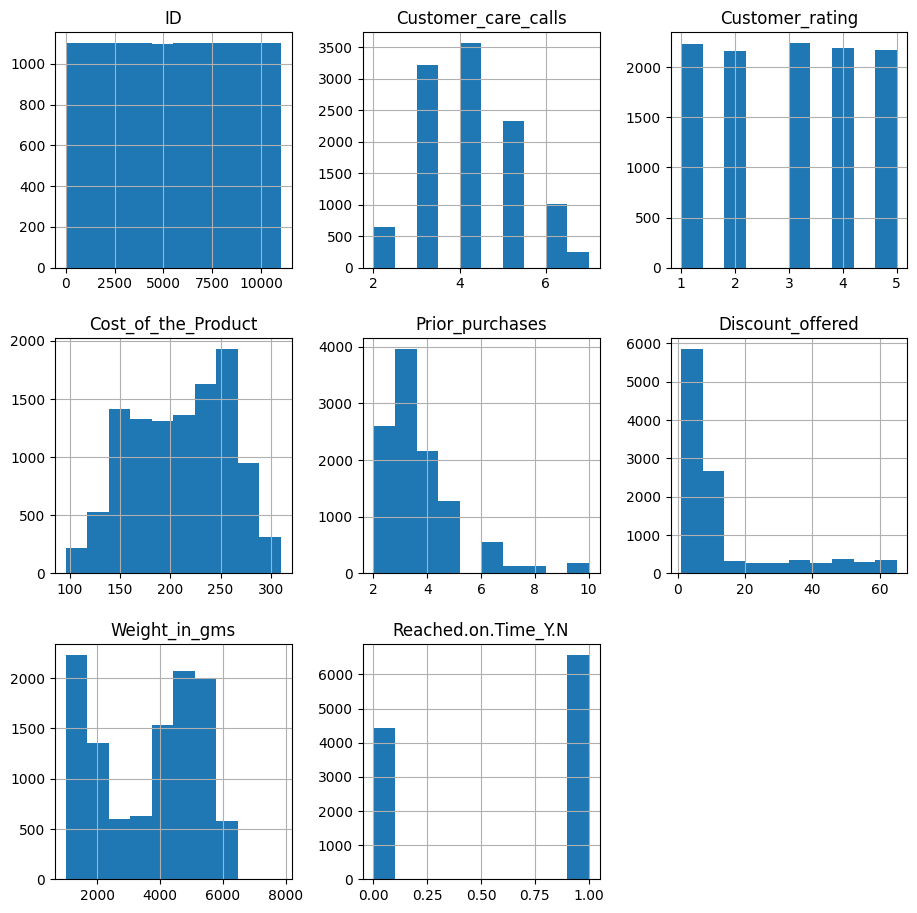

In [ ]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
             .index.values].hist(figsize=[11,11])

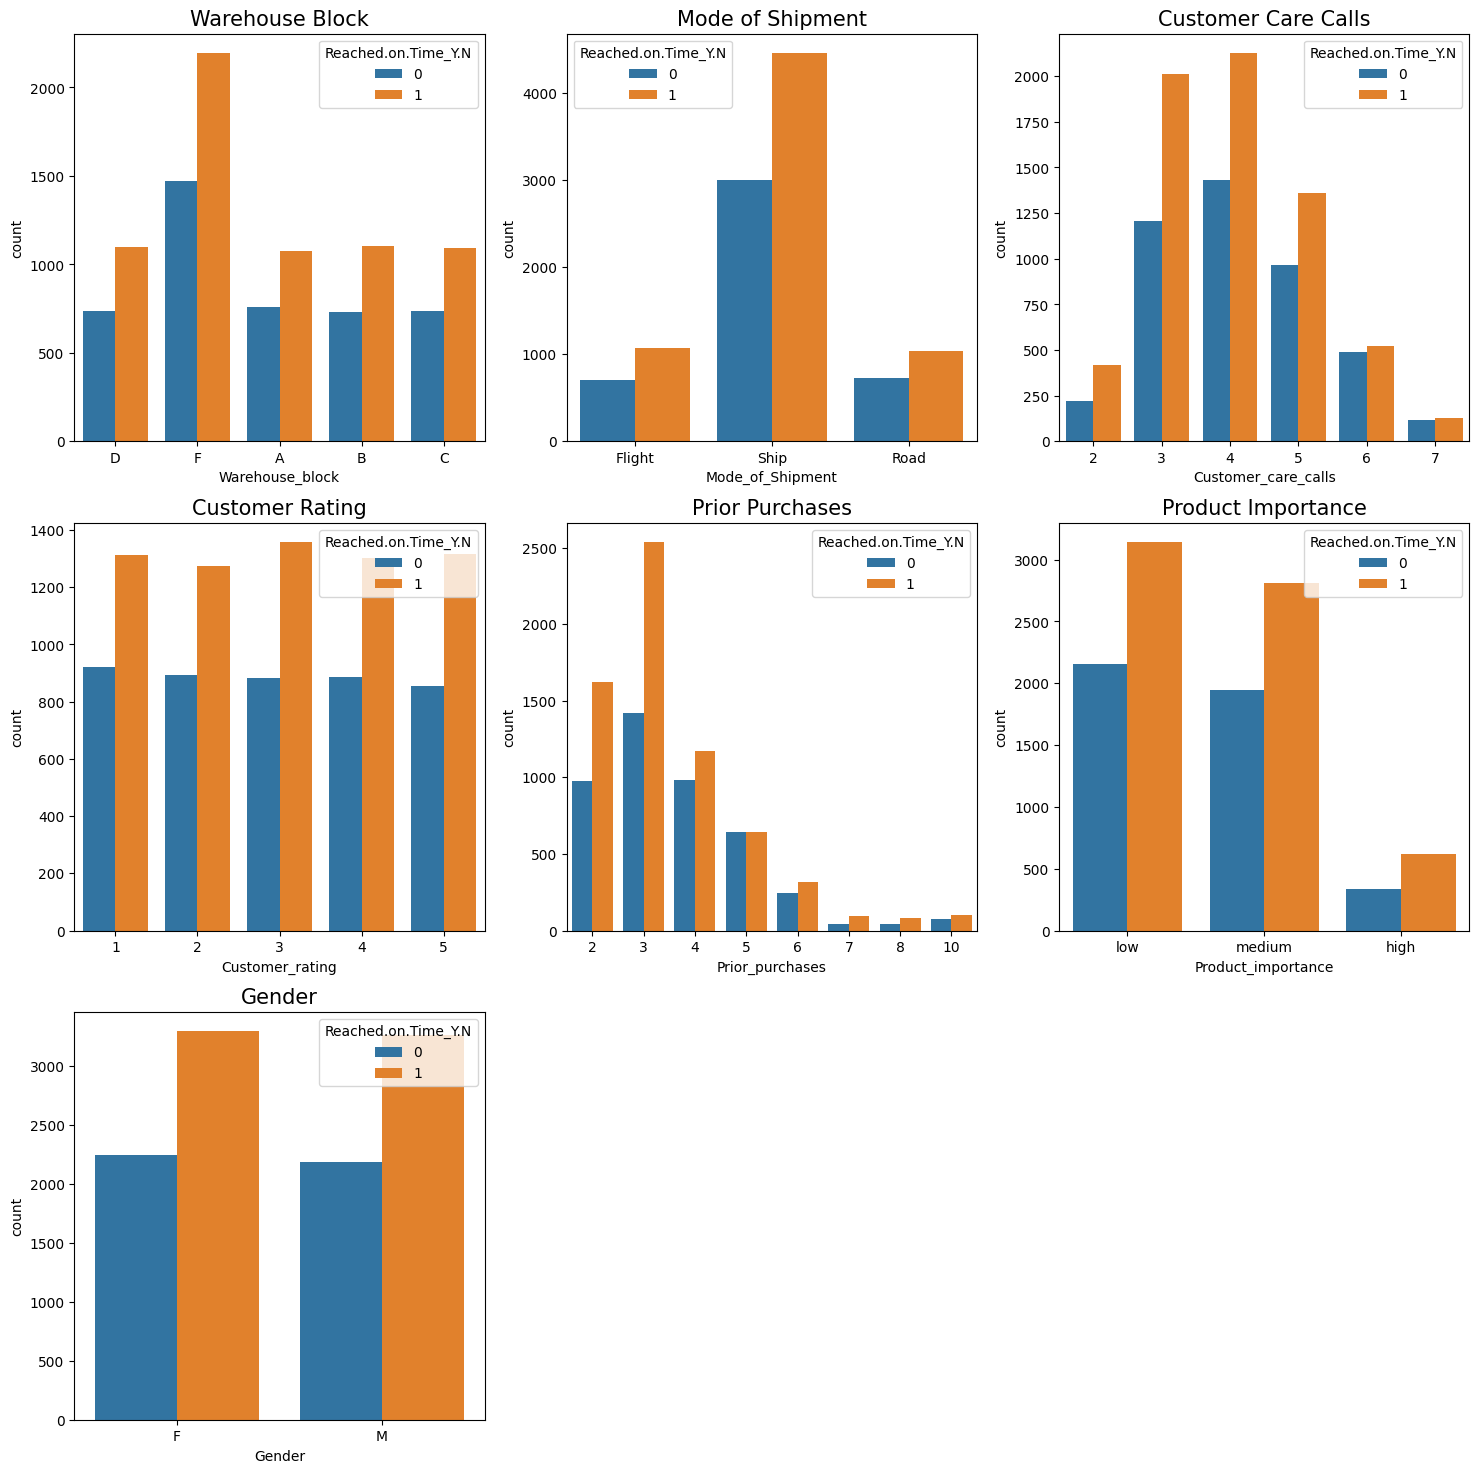

In [ ]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N',  data=data)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N',  data=data)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N',  data=data)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N',  data=data)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N',  data=data)
plt.title('Gender', fontsize=15)

plt.show()

## Data Pre-processing

In [ ]:
data.drop(columns=['ID'], inplace=True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.rename(columns={'Reached.on.Time_Y.N':'Target'},inplace=True)

In [ ]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
num_cols = data.select_dtypes(include='number').columns.tolist()
num_cols

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Target']

In [ ]:
cat_cols.append('Customer_rating')
cat_cols.append('Customer_care_calls')
cat_cols.remove('Warehouse_block')
num_cols.remove('Customer_rating')
num_cols.remove('Customer_care_calls')

### Ordinal Encoding

In [ ]:
cat_data = data[cat_cols]
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(cat_data)

OrdinalEncoder()

In [ ]:
cat_data = ordinal_encoder.transform(cat_data)
cat_data_transformed = pd.DataFrame(cat_data, columns=data[cat_cols].columns.tolist())
cat_data_transformed.head()

,Mode_of_Shipment,Product_importance,Gender,Customer_rating,Customer_care_calls
0,0.0,1.0,0.0,1.0,2.0
1,0.0,1.0,1.0,4.0,2.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,2.0,1.0,2.0,1.0
4,0.0,2.0,0.0,1.0,0.0


### One-hot Encoding

In [ ]:
warehouse_onehot = pd.get_dummies(data['Warehouse_block'], prefix='Warehouse_block')

In [ ]:
train_df = pd.concat([cat_data_transformed, warehouse_onehot], axis=1)
train_df = pd.concat([train_df, data[num_cols]], axis=1)
train_df.head()

,Mode_of_Shipment,Product_importance,Gender,Customer_rating,Customer_care_calls,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target
0,0.0,1.0,0.0,1.0,2.0,0,0,0,1,0,177,3,44,1233,1
1,0.0,1.0,1.0,4.0,2.0,0,0,0,0,1,216,2,59,3088,1
2,0.0,1.0,1.0,1.0,0.0,1,0,0,0,0,183,4,48,3374,1
3,0.0,2.0,1.0,2.0,1.0,0,1,0,0,0,176,4,10,1177,1
4,0.0,2.0,0.0,1.0,0.0,0,0,1,0,0,184,3,46,2484,1


### Handling Outliers

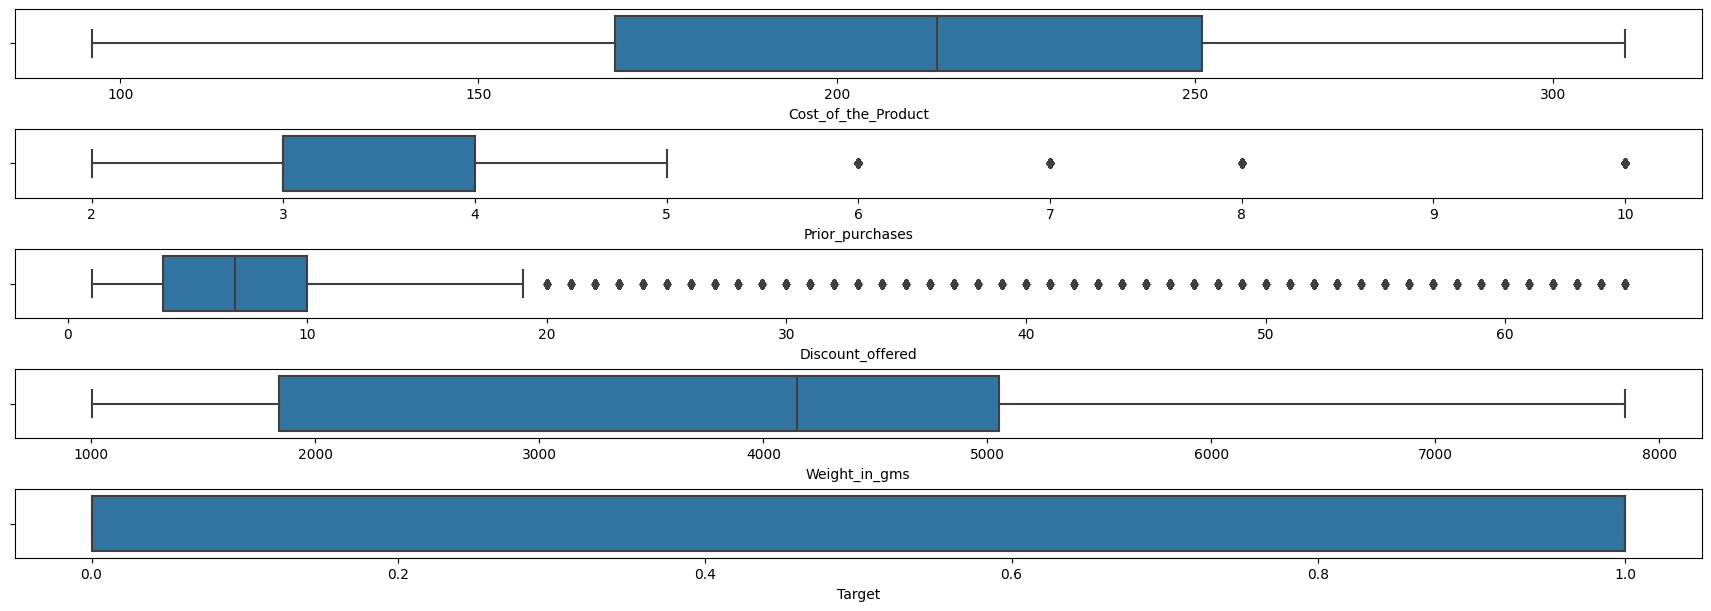

In [ ]:
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(17,6), constrained_layout = True)
i = 0
for col in num_cols:
    sns.boxplot(data=train_df, x=col, ax=axs[i])
    i += 1

In [ ]:
z = np.abs(stats.zscore(train_df))
train_df_clean = train_df[(z<3).all(axis=1)]

Making a base model of data_clean

In [ ]:
df = pd.read_csv('Train.csv')


num_cols = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cat_cols = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [ ]:
df2 = df.copy()
print(f'rows before filtering outliers: {len(df2)}')

filtered_entry1 = np.array([True] * len(df2))

for col in num_cols:
    zscore = abs(stats.zscore(df2[col]))
    filtered_entry1 = (zscore < 3) & filtered_entry1

df2 = df2[filtered_entry1]
print(f'rows after filtering outliers:: {len(df2)}')

rows before filtering outliers: 10999
rows after filtering outliers:: 10642


In [ ]:
df2['Customer_rating'] = MinMaxScaler().fit_transform(df2['Customer_rating'].values.reshape(len(df2), 1))
df2['Customer_care_calls'] = MinMaxScaler().fit_transform(df2['Customer_care_calls'].values.reshape(len(df2), 1))
df2['Cost_of_the_Product'] = MinMaxScaler().fit_transform(df2['Cost_of_the_Product'].values.reshape(len(df2), 1))
df2['Prior_purchases'] = MinMaxScaler().fit_transform(df2['Prior_purchases'].values.reshape(len(df2), 1))
df2['Discount_offered'] = MinMaxScaler().fit_transform(df2['Discount_offered'].values.reshape(len(df2), 1))
df2['Weight_in_gms'] = MinMaxScaler().fit_transform(df2['Weight_in_gms'].values.reshape(len(df2), 1))

In [ ]:
Product_importance_map = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

Gender_map = {
    'F' : 0,
    'M' : 1
}
Mode_of_Shipment_map = {
    'Flight' : 0,
    'Ship' : 1,
    'Road' : 2
}

df2['Product_importance'] = df2['Product_importance'].map(Product_importance_map)
df2['Gender'] = df2['Gender'].map(Gender_map)
df2['Mode_of_Shipment'] = df2['Mode_of_Shipment'].map(Mode_of_Shipment_map)

In [ ]:
onehots = pd.get_dummies(df2['Warehouse_block'], prefix='Warehouse_block')
df2 = df2.join(onehots)

In [ ]:
df2 = df2.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [ ]:
df2.to_csv('data_clean.csv', index=False)

In [ ]:
#--------------------------------------------------------------------------------------new

In [ ]:
df2.head()

In [ ]:
df2 = df2.drop(columns = "ID")

In [ ]:
df2.head()

In [ ]:
y = df2['Reached.on.Time_Y.N']

In [ ]:
X = df2.drop(columns = 'Reached.on.Time_Y.N')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3, random_state=42)

In [ ]:
training_set =  pd.DataFrame(X_train, columns = X_train.columns.tolist(), index=X_train.index)
training_set['Target'] =  y_train

In [ ]:
X = training_set.reset_index()
training_set = X.drop(columns = ["index"])

In [ ]:
training_set.to_csv('Training(Clean).csv', index=False)

In [ ]:
testing_set =  pd.DataFrame(X_test, columns = X_test.columns.tolist(), index=X_test.index)
testing_set['Target'] =  y_test

In [ ]:
X = testing_set.reset_index()
testing_set = X.drop(columns = ["index"])

In [ ]:
testing_set.to_csv('Testing (Clean).csv', index=False)

### Splitting dataset into X and y

In [ ]:
X = train_df_clean.copy()
X.drop(columns=['Target'], inplace=True)
y = train_df_clean['Target']

## Feature Selection

#### Pearson Correlation Feature Selection

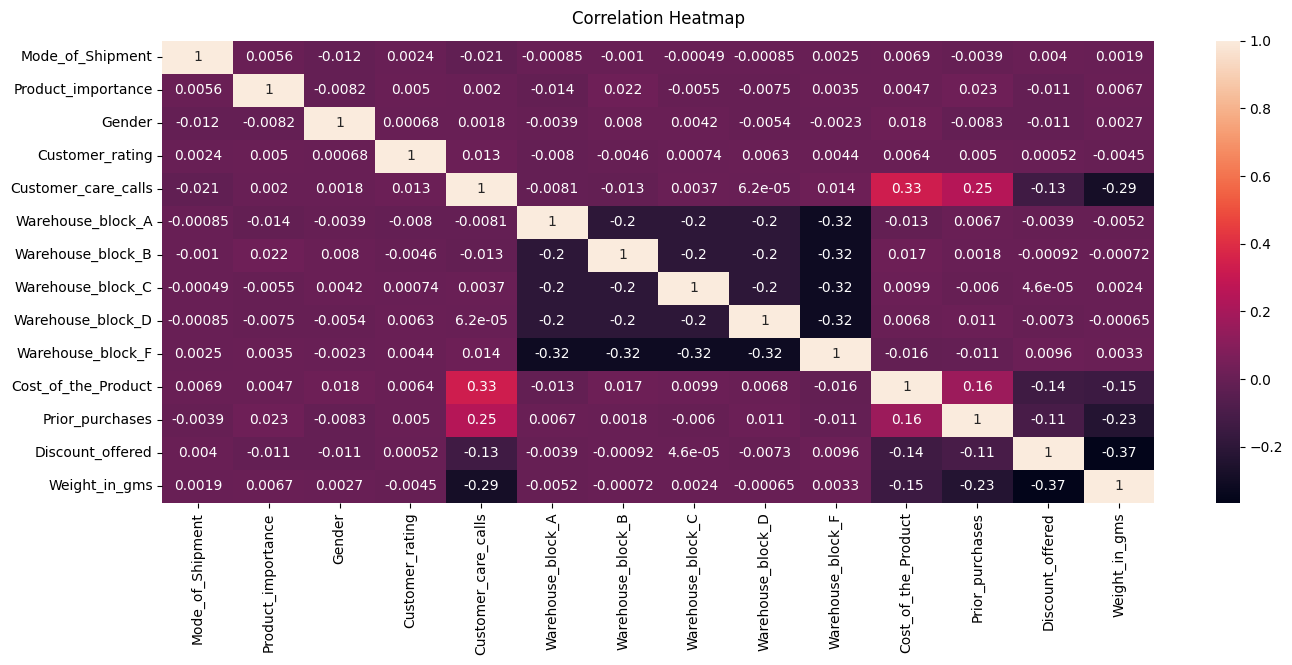

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
cor_list = []
feature_name = X.columns.tolist()
for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y) [0, 1]
    cor_list.append(cor)
cor_list = [0 if np.isnan(i) else i for i in cor_list]
cor_feature = X.iloc[:, np.argsort(np.abs(cor_list)) [-12:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]

#### Backward Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
bfs = SequentialFeatureSelector(dt, n_features_to_select=12, direction='backward', n_jobs=1)

In [ ]:
bfs.fit(X, y)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeClassifier(),
                          n_features_to_select=12, n_jobs=1)

In [ ]:
bfs_support = bfs.get_support()

#### Recursive Feature Selection

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
rfe_selector = RFE(dt, n_features_to_select=12, step=10, verbose=False)

In [ ]:
rfe_selector.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12, step=10,
    verbose=False)

In [ ]:
rfe_support = rfe_selector.get_support()

In [ ]:
rfe_feature = X.loc[:,rfe_support].columns.tolist()

#### Chi-Square Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi_selector = SelectKBest(chi2, k=12)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

#### (Tree-Based) Random Forest Feature Selection

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
embedded_rf_selector = SelectFromModel(rf, max_features=12)
embedded_rf_selector.fit(X, y)

embedded_rf_support = embedded_rf_selector.get_support()
embedded_rf_feature = X.loc[:,embedded_rf_support].columns.tolist()

#### (Tree-Based) LightGBM Feature Selection

In [ ]:
lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05,
                          num_leaves = 32, colsample_bytree=0.2,
                          reg_alpha=3, reg_lambda=1, min_split_gain=0.01,
                          min_child_weight=40, verbose=-1)
embedded_lgbm_selector = SelectFromModel(lgbc, max_features = 12)
embedded_lgbm_selector.fit(X, y)

embedded_lgbm_support = embedded_lgbm_selector.get_support()
embedded_lgbm_feature = X.loc[:,embedded_lgbm_support].columns.tolist()

### Ensemble Feature Selection

In [ ]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'BFE':bfs_support, 'RFE':rfe_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Pearson,Chi-2,BFE,RFE,Random Forest,LightGBM,Total
1,Weight_in_gms,True,True,True,True,True,True,6
2,Cost_of_the_Product,True,True,True,True,True,True,6
3,Discount_offered,True,True,True,True,True,False,5
4,Warehouse_block_D,True,True,True,True,False,False,4
5,Product_importance,True,True,True,True,False,False,4
6,Mode_of_Shipment,True,True,True,True,False,False,4
7,Gender,True,True,True,True,False,False,4
8,Customer_rating,True,True,True,True,False,False,4
9,Customer_care_calls,True,True,True,True,False,False,4
10,Warehouse_block_B,True,True,False,True,False,False,3


In [ ]:
best_features = feature_selection_df['Feature'].tolist()
best_features = best_features[0:11]
best_features

['Weight_in_gms',
 'Cost_of_the_Product',
 'Discount_offered',
 'Warehouse_block_D',
 'Product_importance',
 'Mode_of_Shipment',
 'Gender',
 'Customer_rating',
 'Customer_care_calls',
 'Warehouse_block_B',
 'Warehouse_block_A']

In [ ]:
X_feature_selector = X.loc[:,best_features]

In [ ]:
X_feature_selector.shape

(10642, 11)

In [ ]:
X_feature_selector.head()

,Weight_in_gms,Cost_of_the_Product,Discount_offered,Warehouse_block_D,Product_importance,Mode_of_Shipment,Gender,Customer_rating,Customer_care_calls,Warehouse_block_B,Warehouse_block_A
0,1233,177,44,1,1.0,0.0,0.0,1.0,2.0,0,0
1,3088,216,59,0,1.0,0.0,1.0,4.0,2.0,0,0
2,3374,183,48,0,1.0,0.0,1.0,1.0,0.0,0,1
3,1177,176,10,0,2.0,0.0,1.0,2.0,1.0,1,0
4,2484,184,46,0,2.0,0.0,0.0,1.0,0.0,0,0


### Hypothesis Feature Selection

In [ ]:
X_hypothesis = X
X_hypothesis.drop(columns=['Gender','Product_importance','Customer_rating','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F'], inplace=True)

In [ ]:
X_hypothesis.shape

(10642, 6)

## Feature Scaling

### (MinMax) [Feature Selector]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feature_selector, y,stratify=y,test_size=0.3, random_state=42)

In [ ]:
min_max=MinMaxScaler()

In [ ]:
X_train_transformed = min_max.fit_transform(X_train)
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
training_set =  pd.DataFrame(X_train_transformed, columns = X_train.columns.tolist(), index=X_train.index)
training_set['Target'] =  y_train

In [ ]:
training_set.head()

,Weight_in_gms,Cost_of_the_Product,Discount_offered,Warehouse_block_D,Product_importance,Mode_of_Shipment,Gender,Customer_rating,Customer_care_calls,Warehouse_block_B,Warehouse_block_A,Target
1159,0.259752,0.794393,0.900000,0.0,0.0,1.0,0.0,0.75,0.2,0.0,0.0,1
952,0.322133,0.429907,0.133333,0.0,0.0,0.5,0.0,1.00,0.2,0.0,0.0,1
7689,0.462089,0.481308,0.116667,0.0,1.0,1.0,0.0,0.25,0.2,1.0,0.0,1
1504,0.148283,0.514019,0.366667,0.0,1.0,0.0,1.0,0.25,0.6,0.0,0.0,1
3472,0.570782,0.177570,0.050000,0.0,1.0,1.0,1.0,0.75,0.6,0.0,0.0,0


In [ ]:
X = training_set.reset_index()
training_set = X.drop(columns = ["index"])

In [ ]:
training_set.to_csv('Training (Feature Selector).csv', index=False)

In [ ]:
training_set['Target'].unique()

array([1, 0])

In [ ]:
testing_set =  pd.DataFrame(X_test_transformed, columns = X_test.columns.tolist(), index=X_test.index)
testing_set['Target'] =  y_test

In [ ]:
X = testing_set.reset_index()
testing_set = X.drop(columns = ["index"])

In [ ]:
testing_set.to_csv('Testing (Feature Selector).csv', index=False)

### (MinMax) [Hypothesis]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_hypothesis, y, stratify=y,test_size=0.3, random_state=42)

In [ ]:
min_max=MinMaxScaler()

In [ ]:
X_train_transformed = min_max.fit_transform(X_train)
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
training_set =  pd.DataFrame(X_train_transformed, columns = X_train.columns.tolist(), index=X_train.index)
training_set['Target'] =  y_train

In [ ]:
X = training_set.reset_index()
training_set = X.drop(columns = ["index"])

In [ ]:
training_set = X.drop(columns = ["index"])

In [ ]:
training_set.to_csv('Training (Hypothesis).csv', index=False)

In [ ]:
testing_set =  pd.DataFrame(X_test_transformed, columns = X_test.columns.tolist(), index=X_test.index)
testing_set['Target'] =  y_test

In [ ]:
X = testing_set.reset_index()

In [ ]:
testing_set = X.drop(columns = ["index"])


In [ ]:
testing_set.to_csv('Testing (Hypothesis).csv', index=False)

# SVM

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [ ]:
X = train_df_clean.copy()
X.drop(columns=['Target'], inplace=True)
y = train_df_clean['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3, random_state=42) # 1 st using clean data

In [ ]:
X.shape

(10642, 14)

In [ ]:
svm= SVC(probability = True) # for roc auc score

svm.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_pred) # I think the amount of data is not enough for training the data, thats why accuracy is going lower
print("accuracy:",accuracy)

accuracy: 0.6589414343877231


In [ ]:
print('Train score: ' + str(svm.score(X_train, y_train))) #accuracy
print('Test score:' + str(svm.score(X_test, y_test))) #accuracy

Train score: 0.6551214928178279
Test score:0.6589414343877231


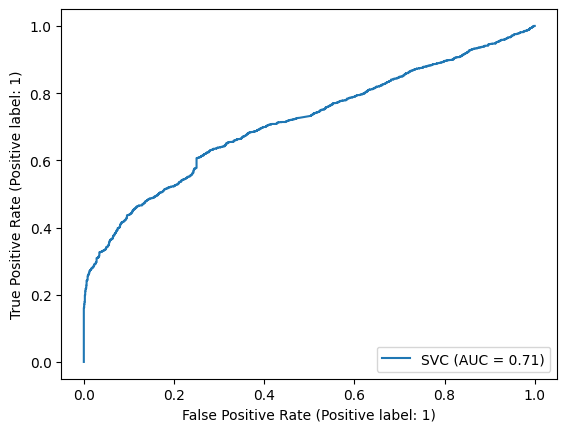

In [ ]:
RocCurveDisplay.from_estimator(svm, X_test, y_test)# I change on target the ROC Curve score to get a better fit model instead
plt.show()

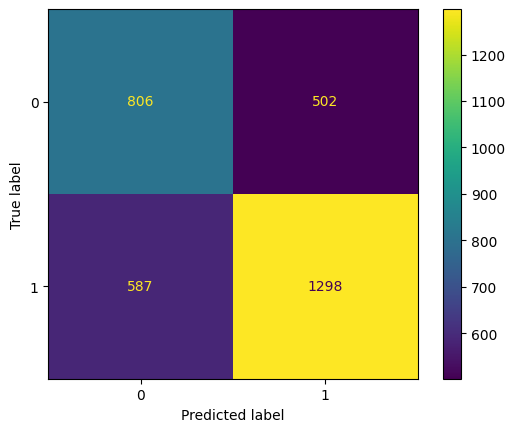

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.show()

In [ ]:

f1_score(y_test, y_pred)

0.7044776119402985

In [ ]:


roc_auc_score(y, svm.predict_proba(X)[:, 1])

0.718182684472017

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1308
           1       0.72      0.69      0.70      1885

    accuracy                           0.66      3193
   macro avg       0.65      0.65      0.65      3193
weighted avg       0.66      0.66      0.66      3193



In [ ]:
df_test_feat = pd.read_csv("Testing (Feature Selector).csv")
df_train_feat = pd.read_csv("Training (Feature Selector).csv")
df_test_hyp = pd.read_csv("Testing (Hypothesis).csv")
df_train_hyp = pd.read_csv("Training (Hypothesis).csv")
X_train = df_train_feat.drop(columns=["Target"])
y_train = df_train_feat["Target"]
X_test = df_test_feat.drop(columns=["Target"])
y_test = df_test_feat["Target"]

In [ ]:
X_train.head()

,Weight_in_gms,Cost_of_the_Product,Discount_offered,Warehouse_block_D,Product_importance,Mode_of_Shipment,Gender,Customer_rating,Customer_care_calls,Warehouse_block_B,Warehouse_block_A
0,0.259752,0.794393,0.900000,0.0,0.0,1.0,0.0,0.75,0.2,0.0,0.0
1,0.322133,0.429907,0.133333,0.0,0.0,0.5,0.0,1.00,0.2,0.0,0.0
2,0.462089,0.481308,0.116667,0.0,1.0,1.0,0.0,0.25,0.2,1.0,0.0
3,0.148283,0.514019,0.366667,0.0,1.0,0.0,1.0,0.25,0.6,0.0,0.0
4,0.570782,0.177570,0.050000,0.0,1.0,1.0,1.0,0.75,0.6,0.0,0.0


In [ ]:
X_train_transformed = min_max.fit_transform(X_train)
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
svm.fit(X_train_transformed,y_train)# fit data(feature selection)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test_transformed)
accuracy = accuracy_score(y_test , y_pred) # I think the amount of data is not enough for training the data, thats why accuracy is going lower
print("accuracy:",accuracy)
print('Train score: ' + str(svm.score(X_train_transformed, y_train))) #accuracy
print('Test score:' + str(svm.score(X_test_transformed, y_test))) #accuracy

accuracy: 0.6495458816160351
Train score: 0.6763323936098805
Test score:0.6495458816160351


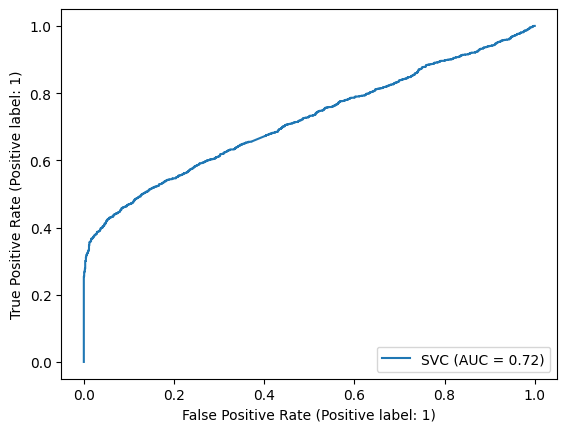

In [ ]:
RocCurveDisplay.from_estimator(svm, X_test_transformed, y_test)# Slightly better than original clean data
plt.show()

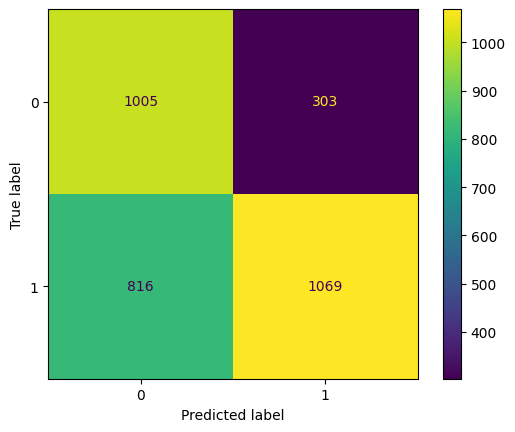

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_transformed, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.6564322996622659

In [ ]:
df = pd.concat([df_test_feat,df_train_feat])

In [ ]:
X = df.drop(columns = ["Target"])
y = df["Target"]

In [ ]:
roc_auc_score(y, svm.predict_proba(X)[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.7442345831544328

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      1308
           1       0.78      0.57      0.66      1885

    accuracy                           0.65      3193
   macro avg       0.67      0.67      0.65      3193
weighted avg       0.69      0.65      0.65      3193



In [ ]:
X_train = df_train_hyp.drop(columns=["Target"]) #hypothesis dataset
y_train = df_train_hyp["Target"]
X_test = df_test_hyp.drop(columns=["Target"])
y_test = df_test_hyp["Target"]

In [ ]:
X_train_transformed = min_max.fit_transform(X_train)
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
svm.fit(X_train_transformed,y_train) # fitting with hypothesis selection

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test_transformed)
accuracy = accuracy_score(y_test , y_pred) # I think the amount of data is not enough for training the data, thats why accuracy is going lower
print("accuracy:",accuracy)
print('Train score: ' + str(svm.score(X_train_transformed, y_train))) #accuracy
print('Test score:' + str(svm.score(X_test_transformed, y_test))) #accuracy

accuracy: 0.6639523958659568
Train score: 0.6744529467042556
Test score:0.6639523958659568


In [ ]:
f1_score(y_test, y_pred)

0.6209819851642528

In [ ]:
df_train_feat.head()


,Weight_in_gms,Cost_of_the_Product,Discount_offered,Warehouse_block_D,Product_importance,Mode_of_Shipment,Gender,Customer_rating,Customer_care_calls,Warehouse_block_B,Warehouse_block_A,Target
0,0.259752,0.794393,0.900000,0.0,0.0,1.0,0.0,0.75,0.2,0.0,0.0,1
1,0.322133,0.429907,0.133333,0.0,0.0,0.5,0.0,1.00,0.2,0.0,0.0,1
2,0.462089,0.481308,0.116667,0.0,1.0,1.0,0.0,0.25,0.2,1.0,0.0,1
3,0.148283,0.514019,0.366667,0.0,1.0,0.0,1.0,0.25,0.6,0.0,0.0,1
4,0.570782,0.177570,0.050000,0.0,1.0,1.0,1.0,0.75,0.6,0.0,0.0,0


In [ ]:
df = pd.concat([df_test_hyp,df_train_hyp])
X = df.drop(columns = ["Target"])
y = df["Target"]

In [ ]:
df.head()

,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target
0,1.0,0.6,0.738318,0.000000,0.066667,0.604708,1
1,1.0,0.4,0.700935,0.166667,0.016667,0.678815,1
2,0.0,0.4,0.799065,0.500000,0.133333,0.081245,0
3,1.0,0.8,0.738318,0.333333,0.016667,0.025968,0
4,1.0,0.4,0.677570,0.000000,0.033333,0.551708,1


In [ ]:
roc_auc_score(y, svm.predict_proba(X)[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.7463787061620649

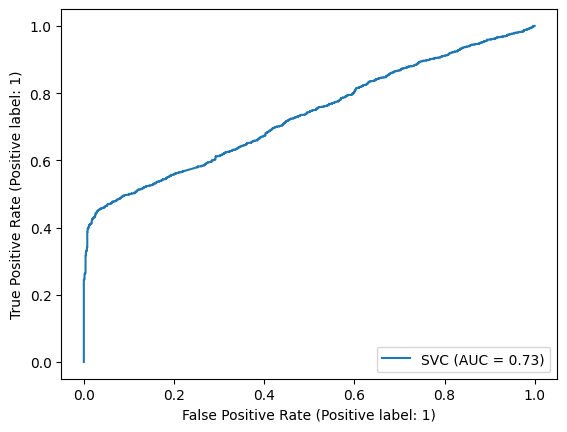

In [ ]:
RocCurveDisplay.from_estimator(svm, X_test_transformed, y_test)# Slightly better than original clean data
plt.show()

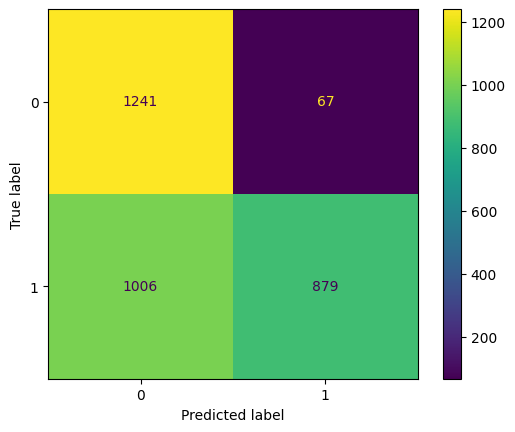

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_transformed, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1308
           1       0.93      0.47      0.62      1885

    accuracy                           0.66      3193
   macro avg       0.74      0.71      0.66      3193
weighted avg       0.77      0.66      0.65      3193



##Grid Search(SVM)

In [ ]:
df_test_feat = pd.read_csv("Testing (Feature Selector).csv")     # picking two dataset of better fit by comparing Roc auc score  df_hyp and df_feature_selection
df_train_feat = pd.read_csv("Training (Feature Selector).csv")
df_test_hyp = pd.read_csv("Testing (Hypothesis).csv")
df_train_hyp = pd.read_csv("Training (Hypothesis).csv")
X_train = df_train_feat.drop(columns=["Target"])
y_train = df_train_feat["Target"]
X_test = df_test_feat.drop(columns=["Target"])
y_test = df_test_feat["Target"]

In [ ]:
X_train_transformed = min_max.fit_transform(X_train) # feature selection dataset
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
svm= SVC(probability = True)
params= {'C': [0.001,0.05 ,0.1, 0.5, 1, 10, 100 ], 'kernel': ['linear', 'rbf','sigmoid'],'gamma':['scale', 'auto',1, 0.1, 0.01], 'class_weight': [None, 'balanced'], 'random_state': [42]}
grid= GridSearchCV(svm, param_grid= params, cv=10, n_jobs= -1, scoring= 'accuracy',verbose=3,refit=True)
grid.fit(X_train_transformed, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
y_pred= grid.predict(X_test)
accuracy= accuracy_score(y_test , y_pred)
print("accuracy:",accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(grid, X_test_transformed, y_test)
plt.show()
ConfusionMatrixDisplay.from_estimator(grid, X_test_transformed, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
df = pd.concat([df_test_feat,df_train_feat])
X = df.drop(columns = ["Target"])
y = df["Target"]

In [ ]:
roc_auc_score(y, grid.predict_proba(X)[:, 1])

In [ ]:
X_train = df_train_hyp.drop(columns=["Target"])  # using hyp dataset
y_train = df_train_hyp["Target"]
X_test = df_test_hyp.drop(columns=["Target"])
y_test = df_test_hyp["Target"]

In [ ]:
X_train_transformed = min_max.fit_transform(X_train)
X_test_transformed = min_max.fit_transform(X_test)

In [ ]:
params= {'C': [0.001,0.05 ,0.1, 0.5, 1, 10, 100 ], 'kernel': ['linear', 'rbf','sigmoid'],'gamma':['scale', 'auto',1, 0.1, 0.01], 'class_weight': [None, 'balanced'], 'random_state': [42]}
grid= GridSearchCV(svm, param_grid= params, cv=5, n_jobs= -1, scoring= 'accuracy',verbose=1,refit=True)
grid.fit(X_train_transformed, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
y_pred= grid.predict(X_test)
accuracy= accuracy_score(y_test , y_pred)
print("accuracy:",accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(grid, X_test_transformed, y_test)
plt.show()
ConfusionMatrixDisplay.from_estimator(grid, X_test_transformed, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
df = pd.concat([df_test_hyp,df_train_hyp])
X = df.drop(columns = ["Target"])
y = df["Target"]

In [ ]:
roc_auc_score(y, grid.predict_proba(X)[:, 1])

# Decision Tree

In [ ]:
X_train_feature_selector = pd.read_csv('Training (Feature Selector).csv')
y_train_feature_selector = X_train_feature_selector['Target']
X_train_feature_selector.drop(columns=['Target'], inplace=True)

In [ ]:
X_test_feature_selector = pd.read_csv('Testing (Feature Selector).csv')
y_test_feature_selector = X_test_feature_selector['Target']
X_test_feature_selector.drop(columns=['Target'], inplace=True)

In [ ]:
X_train_hypothesis = pd.read_csv('Training (Hypothesis).csv')
y_train_hypothesis = X_train_hypothesis['Target']
X_train_hypothesis.drop(columns=['Target'], inplace=True)

In [ ]:
X_test_hypothesis = pd.read_csv('Testing (Hypothesis).csv')
y_test_hypothesis = X_test_hypothesis['Target']
X_test_hypothesis.drop(columns=['Target'], inplace=True)

### Base Model

In [ ]:
base_model_feature_selector = DecisionTreeClassifier()

In [ ]:
base_model_hypothesis = DecisionTreeClassifier()

In [ ]:
base_model_feature_selector.fit(X_train_feature_selector,y_train_feature_selector)

DecisionTreeClassifier()

In [ ]:
base_model_hypothesis.fit(X_train_hypothesis, y_train_hypothesis)

DecisionTreeClassifier()

In [ ]:
y_pred_train_feature_selector = base_model_feature_selector.predict(X_train_feature_selector)

In [ ]:
y_pred_train_hypothesis = base_model_hypothesis.predict(X_train_hypothesis)

In [ ]:
y_pred_feature_selector = base_model_feature_selector.predict(X_test_feature_selector)

In [ ]:
y_pred_hypothesis = base_model_hypothesis.predict(X_test_hypothesis)

In [ ]:
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print('Decision Tree (Feature Selection) Training Classification Report:')
print(classification_report(y_train_feature_selector, y_pred_train_feature_selector, target_names=target_names))

Decision Tree (Feature Selection) Training Classification Report:
                          precision    recall  f1-score   support

Doesnt Reach on time (0)       1.00      1.00      1.00      3052
     Reaches on time (1)       1.00      1.00      1.00      4397

                accuracy                           1.00      7449
               macro avg       1.00      1.00      1.00      7449
            weighted avg       1.00      1.00      1.00      7449



In [ ]:
y_prob_feature_selector_train = base_model_feature_selector.predict_proba(X_train_feature_selector)[::,1]
roc_score = roc_auc_score(y_train_feature_selector, y_prob_feature_selector_train)
print('Decision Tree (Feature Selection) Training ROC Score:', roc_score)

Decision Tree (Feature Selection) Training ROC Score: 1.0


In [ ]:
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print('Decision Tree (Feature Selection) Testing Classification Report:')
print(classification_report(y_test_feature_selector, y_pred_feature_selector, target_names=target_names))

Decision Tree (Feature Selection) Testing Classification Report:
                          precision    recall  f1-score   support

Doesnt Reach on time (0)       0.55      0.52      0.54      1308
     Reaches on time (1)       0.68      0.70      0.69      1885

                accuracy                           0.63      3193
               macro avg       0.62      0.61      0.61      3193
            weighted avg       0.63      0.63      0.63      3193



In [ ]:
y_prob_feature_selector_test = base_model_feature_selector.predict_proba(X_test_feature_selector)[::,1]
roc_score = roc_auc_score(y_test_feature_selector, y_prob_feature_selector_test)
print('Decision Tree (Feature Selection) Testing ROC Score:', roc_score)

Decision Tree (Feature Selection) Testing ROC Score: 0.6137225318180711


In [ ]:
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print('Decision Tree (Hypothesis) Training Classification Report:')
print(classification_report(y_train_hypothesis, y_pred_train_hypothesis, target_names=target_names))

Decision Tree (Hypothesis) Training Classification Report:
                          precision    recall  f1-score   support

Doesnt Reach on time (0)       1.00      1.00      1.00      3052
     Reaches on time (1)       1.00      1.00      1.00      4397

                accuracy                           1.00      7449
               macro avg       1.00      1.00      1.00      7449
            weighted avg       1.00      1.00      1.00      7449



In [ ]:
y_prob_hypothesis_train = base_model_hypothesis.predict_proba(X_train_hypothesis)[::,1]
roc_score = roc_auc_score(y_train_hypothesis, y_prob_hypothesis_train)
print('Decision Tree (Hypothesis) Training ROC Score:', roc_score)

Decision Tree (Hypothesis) Training ROC Score: 1.0


In [ ]:
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print('Decision Tree (Hypothesis) Testing Classification Report:')
print(classification_report(y_test_hypothesis, y_pred_hypothesis, target_names=target_names))

Decision Tree (Hypothesis) Testing Classification Report:
                          precision    recall  f1-score   support

Doesnt Reach on time (0)       0.54      0.52      0.53      1308
     Reaches on time (1)       0.68      0.70      0.69      1885

                accuracy                           0.62      3193
               macro avg       0.61      0.61      0.61      3193
            weighted avg       0.62      0.62      0.62      3193



In [ ]:
y_prob_hypothesis_test = base_model_hypothesis.predict_proba(X_test_hypothesis)[::,1]
roc_score = roc_auc_score(y_test_hypothesis, y_prob_hypothesis_test)
print('Decision Tree (Hypothesis) Testing ROC Score:', roc_score)

Decision Tree (Hypothesis) Testing ROC Score: 0.607481403969857


### GridSearchCV [Feature Selector]

In [ ]:
parameters = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'], 'min_samples_split':[2, 5, 7], 'max_features':['auto','sqrt','log2'], 'max_depth': [3, 5, 7, 10, None]}

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, parameters, cv=rskf)

In [ ]:
/dt_grid.fit(X_train_feature_selector,y_train_feature_selector)

In [ ]:
results = pd.DataFrame(dt_grid.cv_results_)

In [ ]:
results_summary = results[['param_criterion','param_splitter', 'param_min_samples_split', 'param_max_features', 'param_max_depth', 'mean_test_score','rank_test_score']]
results_summary.sort_values('rank_test_score',inplace=True)

In [ ]:
results_summary.head()

### GridSearchCV [Hypothesis]

In [ ]:
parameters = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'], 'min_samples_split':[2, 5, 7], 'max_features':['auto','sqrt','log2'], 'max_depth': [3, 5, 7, 10, None]}

In [ ]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, parameters, cv=rskf)

In [ ]:
dt_grid.fit(X_train_hypothesis, y_train_hypothesis)

In [ ]:
results = pd.DataFrame(dt_grid.cv_results_)

In [ ]:
results_summary = results[['param_criterion','param_splitter', 'param_min_samples_split', 'param_max_features', 'param_max_depth', 'mean_test_score','rank_test_score']]
results_summary.sort_values('rank_test_score',inplace=True)

In [ ]:
results_summary.head()

In [ ]:
best_model = dt_grid.best_estimator_

## Best Decision Tree Model Evaluation

In [ ]:
y_pred = best_model.predict(X_test_hypothesis)

In [ ]:
# Classification Report
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print(classification_report(y_test_hypothesis, y_pred, target_names=target_names))

In [ ]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_hypothesis, y_pred)

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Greens')

In [ ]:
# AUC ROC
y_prob = best_model.predict_proba(X_test_hypothesis)[::,1]
roc_score = roc_auc_score(y_test_hypothesis, y_prob)
print('ROC Score:', roc_score)

In [ ]:
dt_fpr, dt_tpr, _ = roc_curve(y_test_hypothesis, y_prob)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [ ]:
print(f'Decision tree has {best_model.tree_.node_count} nodes with maximum depth {best_model.tree_.max_depth}.')

In [ ]:
# Feature importance
fi = pd.DataFrame({'feature': X_test_feature_selector.columns.tolist(),
                   'importance': base_model_feature_selector.feature_importances_}).sort_values('importance', ascending = False)
fi

In [ ]:
# Image of the Tree
fig = plt.figure(figsize=(25,20))
plot_tree(best_model,feature_names=X_train_hypothesis.columns,class_names=['On Time','Delayed'],filled = True, rounded = True)

In [ ]:
fig.savefig("decistion_tree.png")

# Logistic Regression

### Base Model

In [ ]:
# Reading the csv for the base model and then splitting them to X and y
df_base = pd.read_csv("data_clean.csv")

X = df_base.drop(columns=["Reached.on.Time_Y.N", "ID"])
y = df_base["Reached.on.Time_Y.N"]

FileNotFoundError: ignored

In [ ]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver="liblinear")

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Checking Coefficents to see if there are any insights
model.coef_

array([[-1.53386319, -0.44764803,  6.24850277,  0.04519704, -0.22620455,
        -0.52276694, -0.03010527,  0.07679668, -0.59083403,  0.08955921,
        -0.03081175]])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

In [ ]:
y_decision = model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_decision)

In [ ]:
roc_auc_score(y_test, y_decision)

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion).plot()
plt.show()

In [ ]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score

def best_subset(estimator, X, y, max_size=8, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1)
               for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores

In [ ]:
# Finding the best subset, this takes around 15 mins to test
# best_subset(model, X_train, y_train, max_size=17
# X_train.info()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# The parameter grid we will be using for GSCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
}

In [ ]:
# We will be using Stratified K Fold for cv on GSCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
modelcv = GridSearchCV(model, param_grid, cv = cv)

In [ ]:
modelcv.fit(X_train, y_train)

In [ ]:
# We see the best paramters
print(modelcv.best_params_)

In [ ]:
# Checking Coefficents to see if there are any insights
modelcv.best_estimator_.coef_

In [ ]:
y_pred = modelcv.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_decision = modelcv.best_estimator_.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_decision)

In [ ]:
roc_auc_score(y_test, y_decision)

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion).plot()
plt.show()

### Algorithm Based Feature Selection

In [ ]:
df_test_feat = pd.read_csv("Testing (Feature Selector).csv")
df_train_feat = pd.read_csv("Training (Feature Selector).csv")
df_test_hyp = pd.read_csv("Testing (Hypothesis).csv")
df_train_hyp = pd.read_csv("Training (Hypothesis).csv")

In [ ]:
X_train = df_train_feat.drop(columns=["Unnamed: 0", "Target"])
y_train = df_train_feat["Target"]
X_test = df_test_feat.drop(columns=["Unnamed: 0", "Target"])
y_test = df_test_feat["Target"]

In [ ]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()
plt.show()

### GridSearchCV (Algorithm Based Feature Selection)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
modelcv = GridSearchCV(model, param_grid, cv = cv)
modelcv.fit(X_train, y_train)

In [ ]:
print(modelcv.best_params_)

In [ ]:
y_pred = modelcv.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()
plt.show()

### Feature Selected Model (Hypothesis)

In [ ]:
X_train = df_train_hyp.drop(columns=["Unnamed: 0", "Target"])
y_train = df_train_hyp["Target"]
X_test = df_test_hyp.drop(columns=["Unnamed: 0", "Target"])
y_test = df_test_hyp["Target"]

In [ ]:
model = LogisticRegression(solver="liblinear")

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion).plot()
plt.show()

### GridSearchCV (Hypothesis)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
modelcv = GridSearchCV(model, param_grid, cv = cv)
modelcv.fit(X_train, y_train)

In [ ]:
print(modelcv.best_params_)

In [ ]:
y_pred = modelcv.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion).plot()
plt.show()

# SGD

In [ ]:
params = {
    "loss" : ["hinge", "log_loss", "modified_huber"],
    "alpha" : [0.0001, 0.001]
}

SGD_model = SGDClassifier(random_state=42)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
SGD_gridsearch = GridSearchCV(SGD_model, param_grid=params, cv=rskf)

In [ ]:
def train_SGD_model(X_train, y_train, X_test, y_test):
    start = time.time()
    SGD_gridsearch.fit(X_train, y_train)
    end = time.time()
    results = pd.DataFrame(SGD_gridsearch.cv_results_)
    y_pred = SGD_gridsearch.predict(X_test)
    cm = confusion_matrix(y_test,y_pred,labels=SGD_gridsearch.classes_)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=SGD_gridsearch.classes_)

    print(f"Fit time: {end-start:.4f} seconds")
    print("Best parameters: ",SGD_gridsearch.best_params_)
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1: {f1:.4f}")
    disp.plot()
    plt.show()
    return results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3, random_state=42) # 1 st using clean data

In [ ]:
results = train_SGD_model(X_train, y_train, X_test, y_test)

In [ ]:
feature_train_df = pd.read_csv('Training (Feature Selector).csv')
feature_train_df = feature_train_df.iloc[:, 1:]
feature_X_train = feature_train_df.iloc[:, :-1]
feature_y_train = feature_train_df.iloc[:, -1]

In [ ]:
feature_test_df = pd.read_csv('Testing (Feature Selector).csv')
feature_test_df = feature_test_df.iloc[:, 1:]
feature_X_test = feature_test_df.iloc[:, :-1]
feature_y_test = feature_test_df.iloc[:, -1]

In [ ]:
feature_results = train_SGD_model(feature_X_train, feature_y_train, feature_X_test, feature_y_test)

In [ ]:
hyp_train_df = pd.read_csv('Training (Hypothesis).csv')
hyp_train_df = hyp_train_df.iloc[:, 1:]
hyp_X_train = hyp_train_df.iloc[:, :-1]
hyp_y_train = hyp_train_df.iloc[:, -1]

In [ ]:
hyp_test_df = pd.read_csv('Testing (Hypothesis).csv')
hyp_test_df = hyp_test_df.iloc[:, 1:]
hyp_X_test = hyp_test_df.iloc[:, :-1]
hyp_y_test = hyp_test_df.iloc[:, -1]

In [ ]:
hyp_results = train_SGD_model(hyp_X_train, hyp_y_train, hyp_X_test, hyp_y_test)

# Random Forest

In [ ]:
X_train_feature_selector = pd.read_csv('Training (Feature Selector).csv')
y_train_feature_selector = X_train_feature_selector['Target']
X_train_feature_selector.drop(columns=['Target'], inplace=True)

In [ ]:
X_test_feature_selector = pd.read_csv('Testing (Feature Selector).csv')
y_test_feature_selector = X_test_feature_selector['Target']
X_test_feature_selector.drop(columns=['Target'], inplace=True)

In [ ]:
X_test_hypothesis = pd.read_csv('Testing (Hypothesis).csv')
y_test_hypothesis = X_test_hypothesis['Target']
X_test_hypothesis.drop(columns=['Target'], inplace=True)

In [ ]:
X_train_hypothesis = pd.read_csv('Training (Hypothesis).csv')
y_train_hypothesis = X_train_hypothesis['Target']
X_train_hypothesis.drop(columns=['Target'], inplace=True)

Base Model

In [ ]:
base_model_feature_selector = RandomForestClassifier()

In [ ]:
base_model_hypothesis = RandomForestClassifier()

In [ ]:
base_model_feature_selector.fit(X_train_feature_selector,y_train_feature_selector)

In [ ]:
base_model_hypothesis.fit(X_train_hypothesis, y_train_hypothesis)

In [ ]:
y_predbase_feature_selector = base_model_feature_selector.predict(X_test_feature_selector)

In [ ]:
y_predbase_hypothesis = base_model_hypothesis.predict(X_test_hypothesis)

In [ ]:
base_accuracy_hypothesis = accuracy_score(y_test_hypothesis, y_predbase_hypothesis)
print('The Base accuracy for rf (hypothesis) is: ', base_accuracy_hypothesis)

In [ ]:
base_accuracy_feature_selector = accuracy_score(y_test_feature_selector, y_predbase_feature_selector)
print('The Base accuracy for rf (Feature Selection) is: ', base_accuracy_feature_selector)

In [ ]:
f1 = f1_score(y_test_feature_selector, y_predbase_feature_selector, average='binary')  # Use 'binary' for binary classification tasks
print(f'F1 Score: {f1}')

In [ ]:
f1 = f1_score(y_test_hypothesis, y_predbase_hypothesis, average='binary')  # Use 'binary' for binary classification tasks
print(f'F1 Score: {f1}')

In [ ]:
y_probbase_feature_selector= base_model_feature_selector.predict_proba(X_test_feature_selector)[::,1]
roc_score = roc_auc_score(y_test_feature_selector, y_probbase_feature_selector)
print('ROC Score:', roc_score)

In [ ]:
y_probbase_hypothesis= base_model_hypothesis.predict_proba(X_test_hypothesis)[::,1]
roc_score = roc_auc_score(y_test_hypothesis, y_probbase_hypothesis)
print('ROC Score:', roc_score)

GridSearchCV (Feature Selection Dataset)

In [ ]:
model_Rand = RandomForestClassifier()

In [ ]:
para= {'n_estimators': [100, 150], 'criterion': ["gini", "entropy"], 'max_depth': [3, 5, 8],'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4, 6]}

In [ ]:
model_Grid= GridSearchCV(estimator=model_Rand, param_grid=para, cv=5, n_jobs=-1)

In [ ]:
model_Grid.fit(X_train,y_train)

In [ ]:
results = pd.DataFrame(model_Grid.cv_results_)

In [ ]:
results_summary = results[['param_n_estimators','param_criterion', 'param_max_depth', 'param_min_samples_split',  'mean_test_score','rank_test_score']]
results_summary.sort_values('rank_test_score',inplace=True)

In [ ]:
results_summary.head()

In [ ]:
model_Grid.best_params_

In [ ]:
best_model_feature_selectior = RandomForestClassifier(criterion= 'entropy',
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_split= 6,
 n_estimators= 150)

In [ ]:
best_model_feature_selectior.fit(X_train_feature_selector,y_train_feature_selector)

In [ ]:
best_accuracy_feature_selector = accuracy_score(y_test_feature_selector, y_pred_feature_selector)
print('The best accuracy for rf (Feature Selection) is: ', best_accuracy_feature_selector)

GridSearchCV (Hypothesis)

In [ ]:
model_Rand2= RandomForestClassifier()

In [ ]:
para= {'n_estimators': [100, 150], 'criterion': ["gini", "entropy", ""],'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 8], 'min_samples_split': [2, 4, 6]}

In [ ]:
model_Gridh= GridSearchCV(estimator=model_Rand, param_grid=para, cv=5, n_jobs=-1)

In [ ]:
model_Gridh.fit(X_train_hypothesis, y_train_hypothesis)

In [ ]:
results = pd.DataFrame(model_Gridh.cv_results_)

In [ ]:
results_summary.head()

In [ ]:
model_Gridh.best_params_

In [ ]:
best_model_hypothesis = RandomForestClassifier(criterion= 'entropy',
 max_depth= 3,
 max_features= 'sqrt',
 min_samples_split= 2,
 n_estimators= 150)

In [ ]:
best_model_hypothesis.fit(X_train_hypothesis, y_train_hypothesis)

In [ ]:
best_accuracy_hypothesis = accuracy_score(y_test_hypothesis, y_pred_hypothesis)
print('The best accuracy for rf (hypothesis) is: ', best_accuracy_hypothesis)

Model Evaluation

In [ ]:
y_pred = best_model.predict(X_test_hypothesis)

In [ ]:
y_pred_feature_selector =best_model_feature_selectior.predict(X_test_feature_selector)

In [ ]:
f1 = f1_score(y_test_feature_selector, y_pred_feature_selector, average='binary')  # Use 'binary' for binary classification tasks
print(f'F1 Score: {f1}')

In [ ]:
f1 = f1_score(y_test_hypothesis, y_pred_hypothesis, average='binary')  # Use 'binary' for binary classification tasks
print(f'F1 Score: {f1}')

In [ ]:
# Classification Report
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print(classification_report(y_test_hypothesis, y_pred_hypothesis, target_names=target_names))

In [ ]:
# Classification Report
target_names = ['Doesnt Reach on time (0)', 'Reaches on time (1)']
print(classification_report(y_test_feature_selector, y_pred_feature_selector, target_names=target_names))

Consusion Matrix

In [ ]:
cnf_matrix_h = confusion_matrix(y_test_hypothesis, y_pred_hypothesis)
cnf_matrix

In [ ]:
sns.heatmap(cnf_matrix_h, annot=True, fmt='g', cmap='Reds')

In [ ]:
cnf_matrix_f = confusion_matrix(y_test_feature_selector,y_pred_feature_selector)
cnf_matrix

In [ ]:
sns.heatmap(cnf_matrix_f, annot=True, fmt='g', cmap='Reds')

ROC AUC

In [ ]:
y_prob_hypothesis= best_model_hypothesis.predict_proba(X_test_hypothesis)[::,1]
roc_score = roc_auc_score(y_test_hypothesis, y_prob_hypothesis)
print('ROC Score:', roc_score)

In [ ]:
y_prob_feature_selector= best_model_feature_selectior.predict_proba(X_test_feature_selector)[::,1]
roc_score = roc_auc_score(y_test_hypothesis, y_prob_feature_selector)
print('ROC Score:', roc_score)

In [ ]:
dt_fpr, dt_tpr, _ = roc_curve(y_test_hypothesis, y_prob)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Random Forest Hypothesis')
# title
plt.title('ROC curve Hypothesis')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [ ]:
dt_fpr, dt_tpr, _ = roc_curve(y_test_feature_selector, y_prob)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Random Forest feature_selector')
# title
plt.title('ROC curve feature_selector')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [ ]:
average_nodes = sum(tree.tree_.node_count for tree in best_model_hypothesis.estimators_) / len(best_model_hypothesis.estimators_)
average_max_depth = sum(tree.tree_.max_depth for tree in best_model_hypothesis.estimators_) / len(best_model_hypothesis.estimators_)

print(f'Random Forest has an average of {average_nodes:.0f} nodes and average maximum depth of {average_max_depth:.1f} across all trees.')

In [ ]:
average_nodes = sum(tree.tree_.node_count for tree in best_model_feature_selector.estimators_) / len(best_model_feature_selector.estimators_)
average_max_depth = sum(tree.tree_.max_depth for tree in best_model_feature_selector.estimators_) / len(best_model_feature_selector.estimators_)

print(f'Random Forest has an average of {average_nodes:.0f} nodes and average maximum depth of {average_max_depth:.1f} across all trees.')

Feature Imporatance

In [ ]:
fi = pd.DataFrame({'feature': X_test_feature_selector.columns.tolist(),
                   'importance': base_model_feature_selector.feature_importances_}).sort_values('importance', ascending = False)
fi